## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score

import re
import math
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## About Dataset

### Home Value Insights: A Beginner's Regression Dataset

This dataset is designed for beginners to practice regression problems, particularly in the context of predicting house prices. It contains 1000 rows, with each row representing a house and various attributes that influence its price. The dataset is well-suited for learning basic to intermediate-level regression modeling techniques.

### Features:
1. **Square_Footage**: The size of the house in square feet. Larger homes typically have higher prices.
2. **Num_Bedrooms**: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
3. **Num_Bathrooms**: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
4. **Year_Built**: The year the house was built. Older houses may be priced lower due to wear and tear.
5. **Lot_Size**: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
6. **Garage_Size**: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
7. **Neighborhood_Quality**: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
8. **House_Price (Target Variable)**: The price of the house, which is the dependent variable you aim to predict.

## Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv("/kaggle/input/home-value-insights/house_price_regression_dataset.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.shape

(1000, 8)

In [4]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
# Check missing values
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [6]:
# Check summary 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


In [7]:
# Change column names to snake_case
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head()

,square_footage,num_bedrooms,num_bathrooms,year_built,lot_size,garage_size,neighborhood_quality,house_price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [8]:
# Apply a log1p transformation to the target column to reduce skewness
# log1p(x) computes log(1 + x), which is numerically stable and handles zero values safely.
data['house_price'] = np.log1p(data['house_price'])
data.head()

,square_footage,num_bedrooms,num_bathrooms,year_built,lot_size,garage_size,neighborhood_quality,house_price
0,1360,2,1,1981,0.599637,0,5,12.477564
1,4272,3,3,2016,4.753014,1,6,13.800663
2,3592,1,2,2016,3.634823,0,9,13.564454
3,966,1,2,1977,2.730667,1,8,12.344529
4,4926,2,1,1993,4.699073,0,8,13.856405


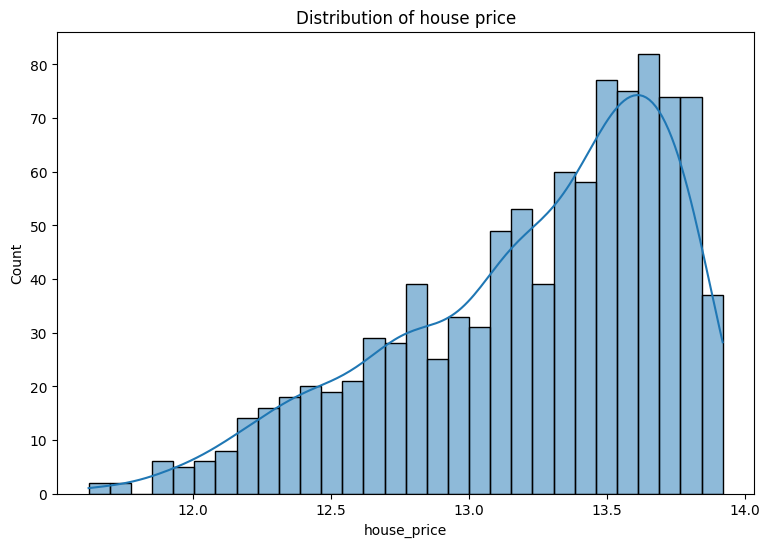

In [9]:
# Data distribution of house_price
plt.figure(figsize=(9, 6))
sns.histplot(data['house_price'], kde=True, bins=30)
plt.title("Distribution of house price")
plt.show()

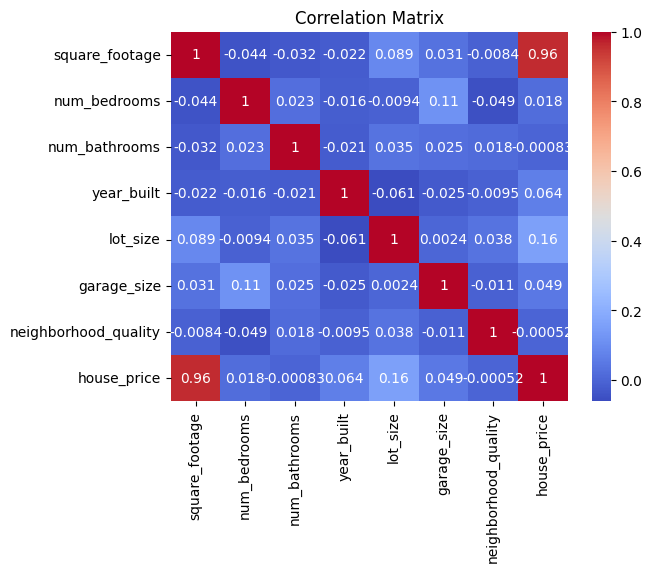

In [10]:
# Correlation analysis
correlation_matrix = data.corr()

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

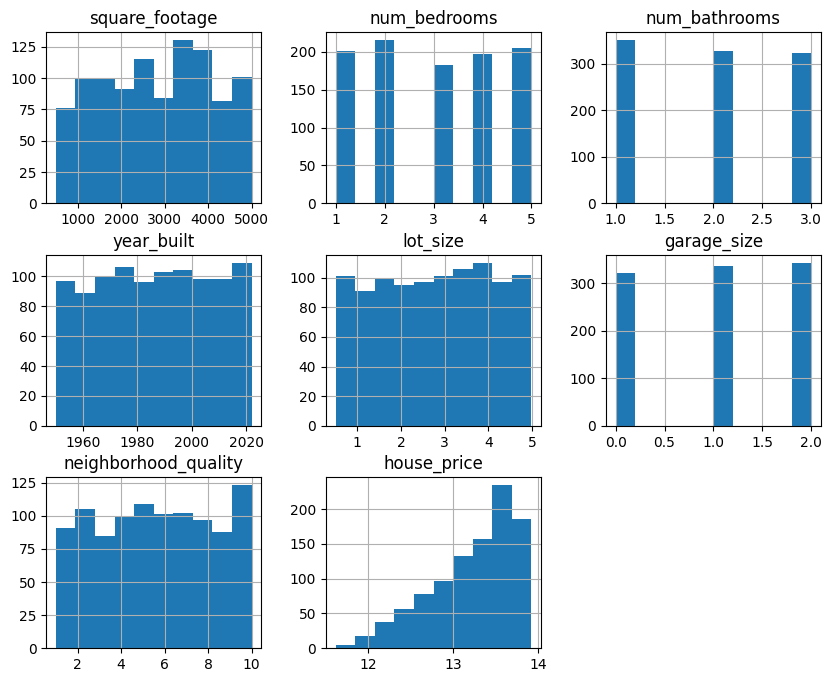

In [11]:
# Histogram
data.hist(bins=10, figsize=(10, 8))
plt.show()

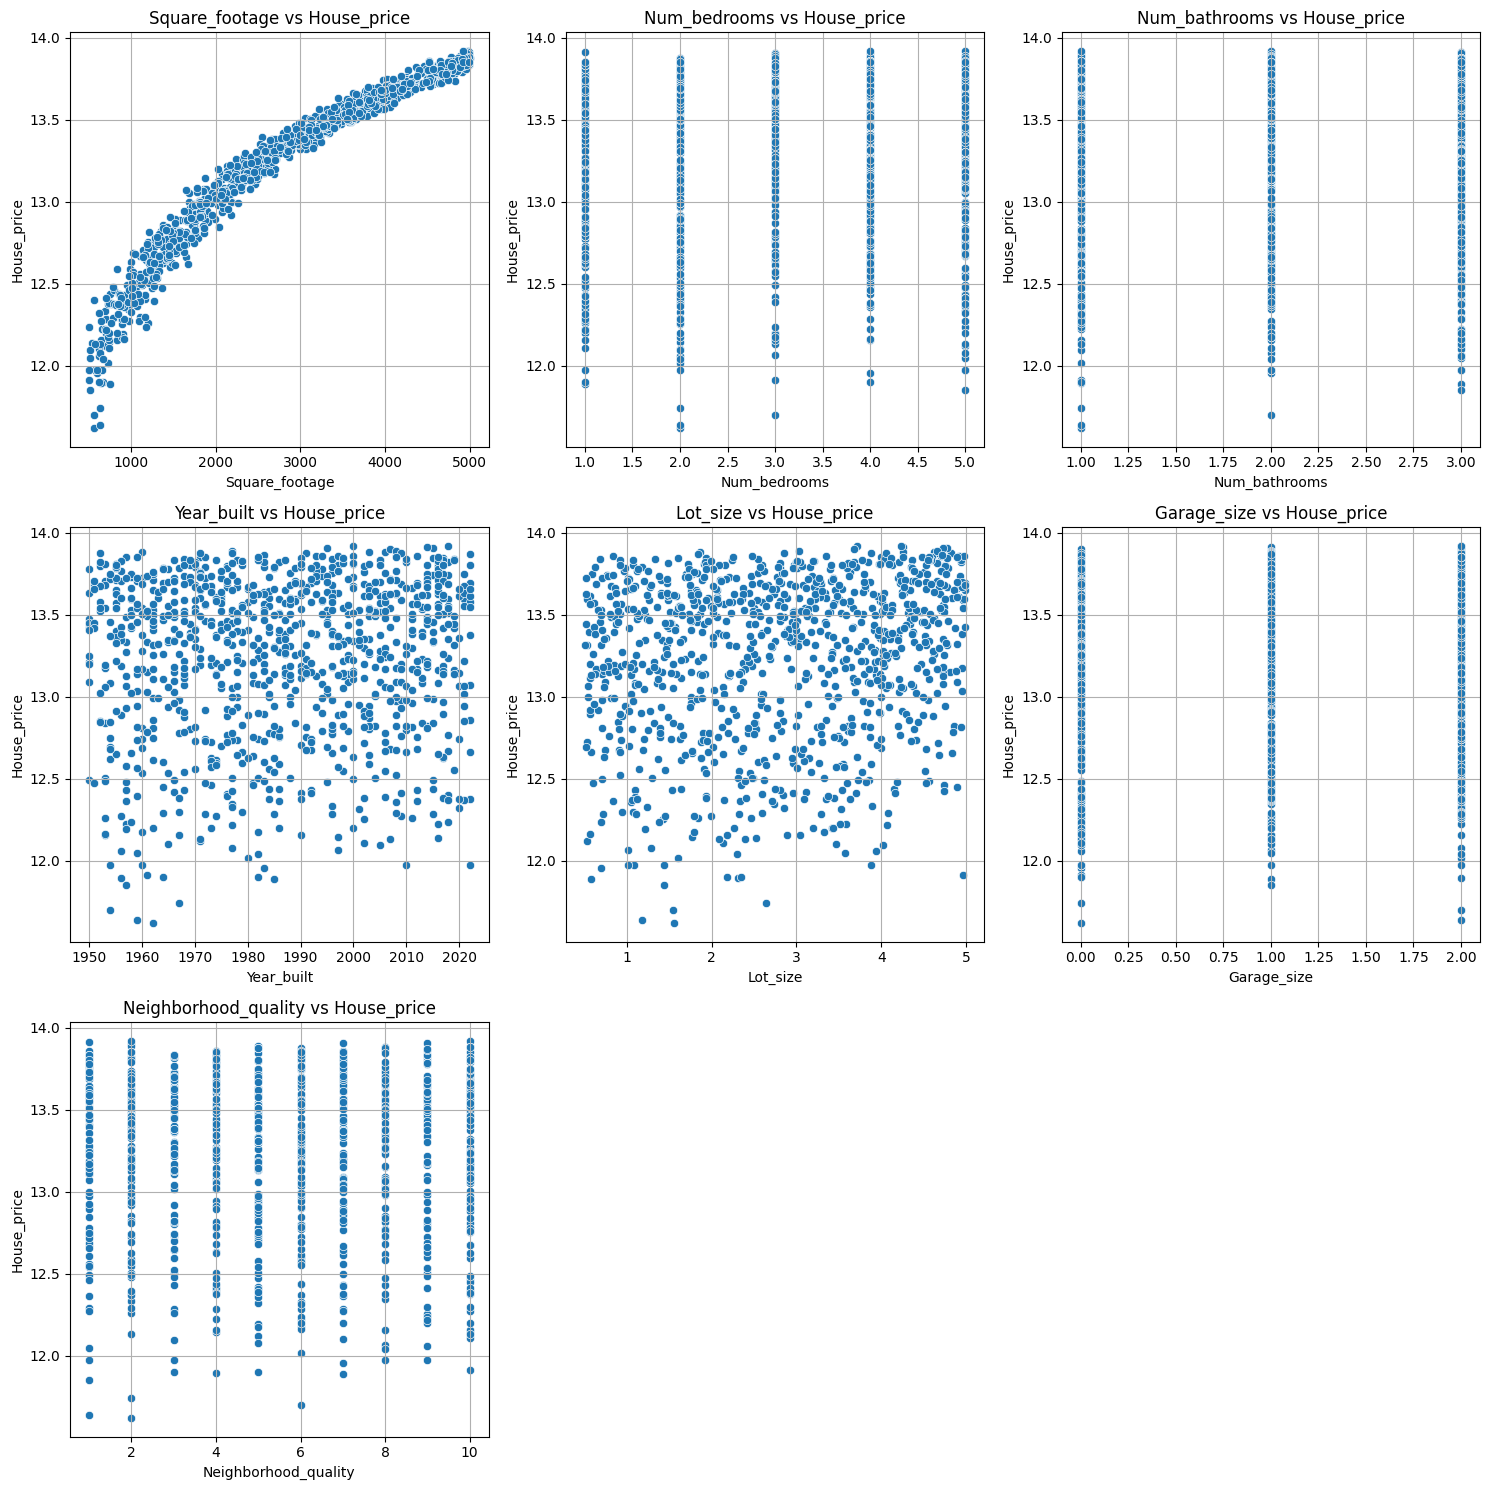

In [12]:
# Define the target variable
target = 'house_price'

# Filter columns except the target
features = [col for col in data.columns if col != target]

# Define the number of plots per row
cols = 3
rows = math.ceil(len(features) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Loop through each feature and create scatterplots
for i, column in enumerate(features):
    sns.scatterplot(x=column, y=target, data=data, ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} vs {target.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel(target.capitalize())
    axes[i].grid(True)

# Turn off unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Feature relationships
# sns.pairplot(data)
# plt.show()

In [14]:
cats = data.loc[:,['num_bedrooms','num_bathrooms','garage_size']]

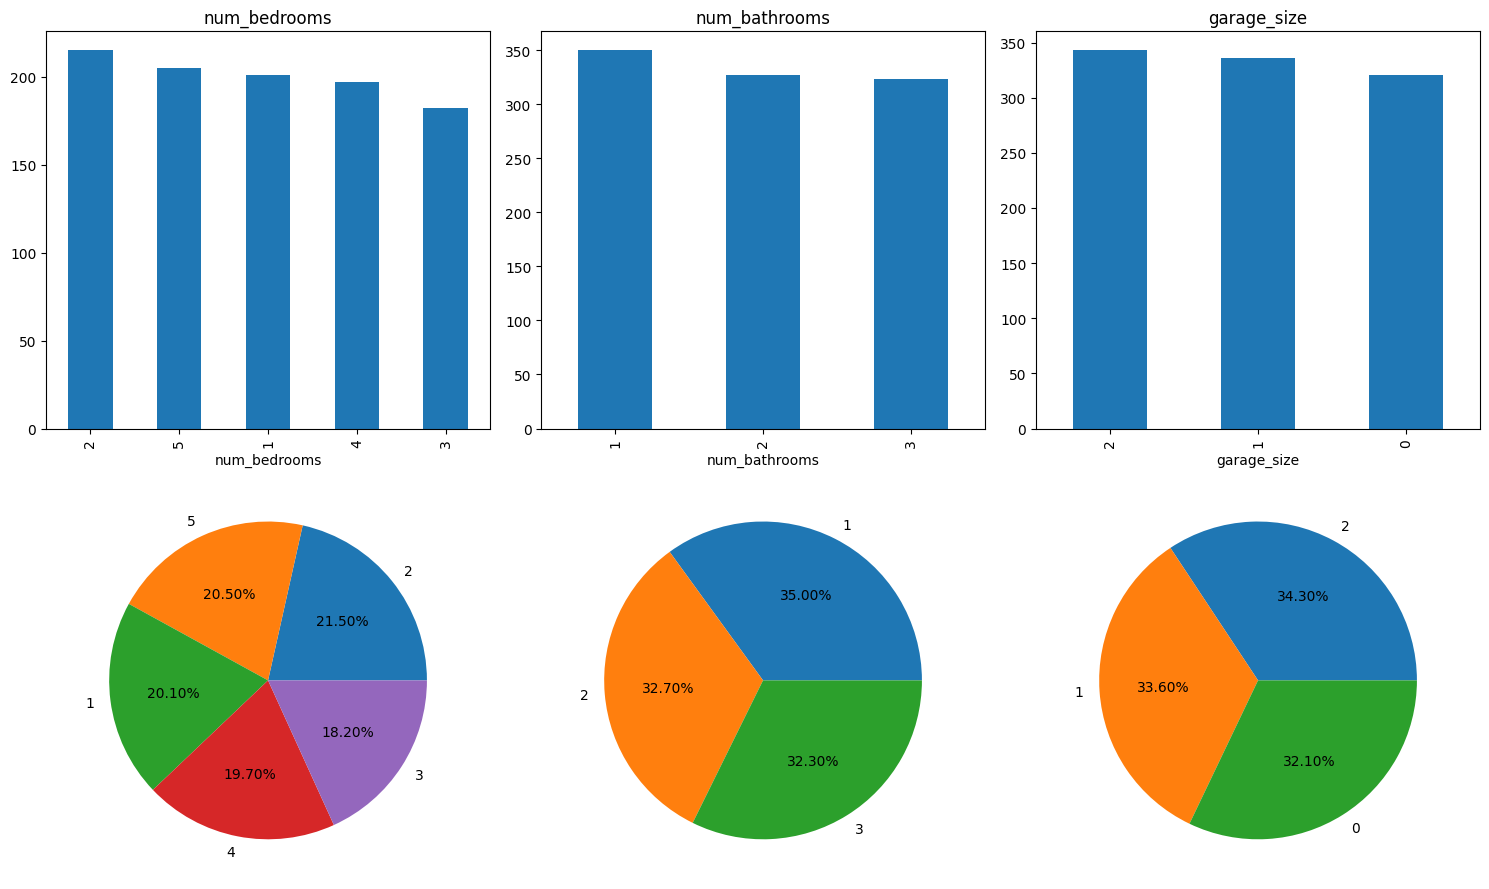

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

for i, j in enumerate(cats):
    index = 0
    count = data[j].value_counts()
    count.plot(kind="bar", ax=axes[index][i])
    axes[index][i].set_title(j)
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title("")
    
plt.tight_layout()
plt.show()

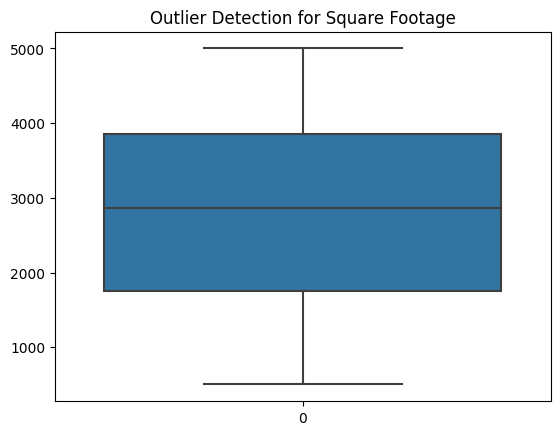

In [16]:
# Outlier Detection
sns.boxplot(data['square_footage'])
plt.title('Outlier Detection for Square Footage')
plt.show()

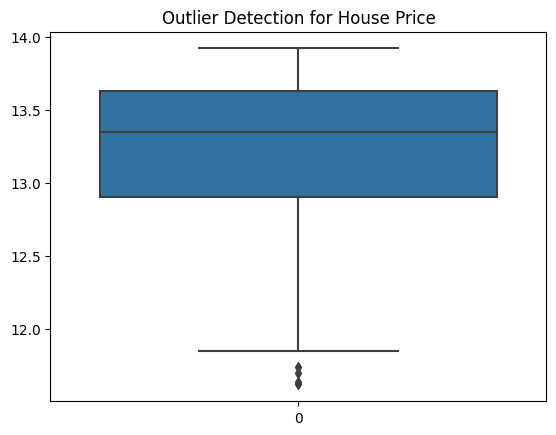

In [17]:
sns.boxplot(data['house_price'])
plt.title('Outlier Detection for House Price')
plt.show()

In [18]:
# Calculate IQR, lower and upper bounds
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
LowerBound = q1 - 1.5 * IQR
UpperBound = q3 + 1.5 * IQR

print("--- Lower Bound ---")
print(LowerBound)
print("\n")
print("--- Upper Bound ---")
print(UpperBound)

--- Lower Bound ---
square_footage         -1400.500000
num_bedrooms              -1.000000
num_bathrooms             -2.000000
year_built              1916.125000
lot_size                  -1.720112
garage_size               -3.000000
neighborhood_quality      -4.500000
house_price               11.819735
dtype: float64


--- Upper Bound ---
square_footage          6999.500000
num_bedrooms               7.000000
num_bathrooms              6.000000
year_built              2057.125000
lot_size                   7.309375
garage_size                5.000000
neighborhood_quality      15.500000
house_price               14.709330
dtype: float64


In [19]:
# Find columns containing outliers
outlier_columns = []

for column in data.columns:
    if ((data[column] < LowerBound[column]) | (data[column] > UpperBound[column])).any():
        outlier_columns.append(column)

print("Columns with outliers:", outlier_columns)


Columns with outliers: ['house_price']


In [20]:
# Filter outliers by applying conditions across all columns
df = data[~((data < LowerBound) | (data > UpperBound)).any(axis=1)]

In [21]:
df.shape

(996, 8)

## Feature Engineering

We will generate new features:
1. **house_age**: Calculates how old the house is.
2. **bed_bath_ratio**: Determines the ratio of bedrooms to bathrooms.
3. **lot_size_per_sqft**: Shows the lot size in relation to the house's size.
4. **garage_space_per_bedroom**: Measures garage space per bedroom.
5. **recently_renovated**: Flags houses renovated in the last 10 years.
6. **modernness_index**: A composite score for modern features.
7. **outdoor_space**: Calculates the unbuilt lot area.
8. **expansion_potential**: Combines lot size and neighborhood quality for potential development.


In [22]:
current_year = 2024

# Generate new features
df['house_age'] = current_year - df['year_built']
df['bed_bath_ratio'] = df['num_bedrooms'] / df['num_bathrooms']
df['lot_size_per_sqft'] = df['lot_size'] / df['square_footage']
df['garage_space_per_bedroom'] = df['garage_size'] / df['num_bedrooms']
df['recently_renovated'] = (df['house_age'] <= 10).astype(int)
df['modernness_index'] = (10 - df['house_age'] / 10) + df['garage_size'] + df['neighborhood_quality']
df['outdoor_space'] = df['lot_size'] - (df['square_footage'] / 43560)  # 43560 sq. ft. in an acre
df['expansion_potential'] = df['lot_size'] * df['neighborhood_quality']

In [23]:
df.head()

,square_footage,num_bedrooms,num_bathrooms,year_built,lot_size,garage_size,neighborhood_quality,house_price,house_age,bed_bath_ratio,lot_size_per_sqft,garage_space_per_bedroom,recently_renovated,modernness_index,outdoor_space,expansion_potential
0,1360,2,1,1981,0.599637,0,5,12.477564,43,2.0,0.000441,0.000000,0,10.7,0.568415,2.998183
1,4272,3,3,2016,4.753014,1,6,13.800663,8,1.0,0.001113,0.333333,1,16.2,4.654942,28.518083
2,3592,1,2,2016,3.634823,0,9,13.564454,8,0.5,0.001012,0.000000,1,18.2,3.552362,32.713404
3,966,1,2,1977,2.730667,1,8,12.344529,47,0.5,0.002827,1.000000,0,14.3,2.708491,21.845335
4,4926,2,1,1993,4.699073,0,8,13.856405,31,2.0,0.000954,0.000000,0,14.9,4.585987,37.592580


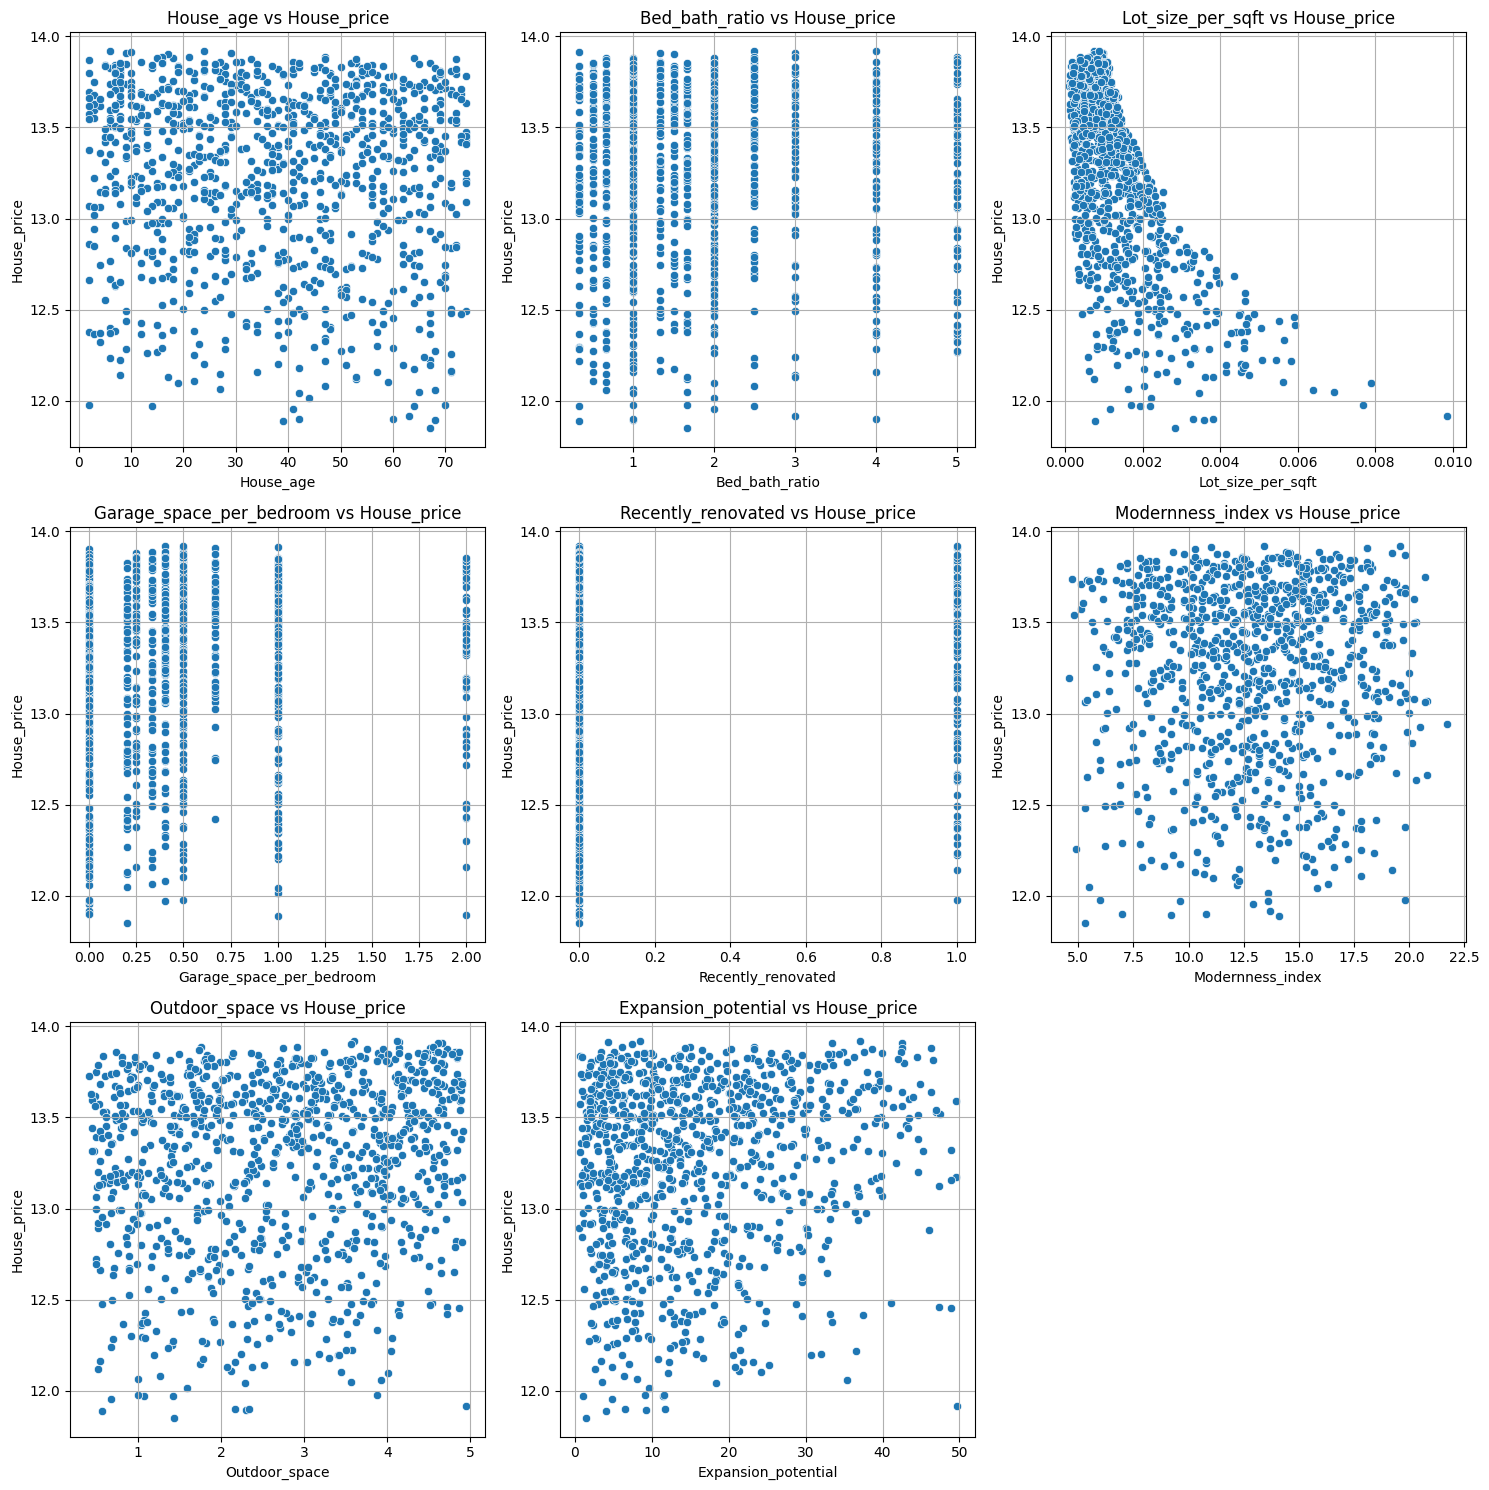

In [24]:
# Define the target variable
target = 'house_price'

# Filter columns except the target
new_features = [
    'house_age',
    'bed_bath_ratio',
    'lot_size_per_sqft',
    'garage_space_per_bedroom',
    'recently_renovated',
    'modernness_index',
    'outdoor_space',
    'expansion_potential'
]


# Define the number of plots per row
cols = 3
rows = math.ceil(len(new_features) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Loop through each feature and create scatterplots
for i, column in enumerate(new_features):
    sns.scatterplot(x=column, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} vs {target.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel(target.capitalize())
    axes[i].grid(True)

# Turn off unused subplots
for i in range(len(new_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Split data into `Train/Test/Valid`

In [25]:
# Split_data
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

len(df_train), len(df_val), len(df_test)

(597, 199, 200)

In [26]:
y_train = df_train.house_price.values
y_val = df_val.house_price.values
y_test = df_test.house_price.values

In [27]:
del df_train['house_price']
del df_val['house_price']
del df_test['house_price']

In [28]:
df_train.head()

,square_footage,num_bedrooms,num_bathrooms,year_built,lot_size,garage_size,neighborhood_quality,house_age,bed_bath_ratio,lot_size_per_sqft,garage_space_per_bedroom,recently_renovated,modernness_index,outdoor_space,expansion_potential
0,3282,5,2,2001,2.383620,0,4,23,2.500000,0.000726,0.000000,0,11.7,2.308276,9.534481
1,4002,3,1,2010,1.073163,1,10,14,3.000000,0.000268,0.333333,0,19.6,0.981289,10.731626
2,4658,1,3,1987,4.544546,2,6,37,0.333333,0.000976,2.000000,0,14.3,4.437613,27.267273
3,2705,1,3,2003,4.100330,2,8,21,0.333333,0.001516,2.000000,0,17.9,4.038232,32.802644
4,3827,3,2,2006,2.372981,0,1,18,1.500000,0.000620,0.000000,0,9.2,2.285125,2.372981


In [29]:
len(df_train), len(y_train)

(597, 597)

## Model Training and Evaluation

In [30]:
train_dict = df_train.to_dict(orient="records")
train_dict[0]

{'square_footage': 3282,
 'num_bedrooms': 5,
 'num_bathrooms': 2,
 'year_built': 2001,
 'lot_size': 2.383620284891701,
 'garage_size': 0,
 'neighborhood_quality': 4,
 'house_age': 23,
 'bed_bath_ratio': 2.5,
 'lot_size_per_sqft': 0.0007262706535319016,
 'garage_space_per_bedroom': 0.0,
 'recently_renovated': 0,
 'modernness_index': 11.7,
 'outdoor_space': 2.308275932274621,
 'expansion_potential': 9.534481139566804}

In [31]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [32]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [33]:
test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [34]:
# Dictionary to store results of each model
results = {}

### Linear Regression

In [35]:
# Train LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Evaluate on the validation set
y_val_pred = lr.predict(X_val)
val_rsme = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RSME: {val_rsme}")
print(f"Validation R2: {val_r2}")

Validation RSME: 0.08817950135552524
Validation R2: 0.9697800602469664


In [37]:
# Add to results
results["lr"] = val_rsme

In [38]:
# Evaluate on the test set (final evaluation)
y_test_pred = lr.predict(X_test)
test_rsme = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RSME: {test_rsme}")
print(f"Test R2: {test_r2}")

Test RSME: 0.08177724708001465
Test R2: 0.9693002330597994


### DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [40]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- square_footage <= 2132.00
|   |--- square_footage <= 1173.00
|   |   |--- square_footage <= 764.50
|   |   |   |--- lot_size_per_sqft <= 0.00
|   |   |   |   |--- expansion_potential <= 13.77
|   |   |   |   |   |--- value: [11.98]
|   |   |   |   |--- expansion_potential >  13.77
|   |   |   |   |   |--- value: [12.12]
|   |   |   |--- lot_size_per_sqft >  0.00
|   |   |   |   |--- square_footage <= 617.50
|   |   |   |   |   |--- value: [12.08]
|   |   |   |   |--- square_footage >  617.50
|   |   |   |   |   |--- value: [12.26]
|   |   |--- square_footage >  764.50
|   |   |   |--- square_footage <= 1001.50
|   |   |   |   |--- house_age <= 53.50
|   |   |   |   |   |--- value: [12.38]
|   |   |   |   |--- house_age >  53.50
|   |   |   |   |   |--- value: [12.23]
|   |   |   |--- square_footage >  1001.50
|   |   |   |   |--- house_age <= 30.50
|   |   |   |   |   |--- value: [12.57]
|   |   |   |   |--- house_age >  30.50
|   |   |   |   |   |--- value: [12.43]
|   |--- squar

In [41]:
# Evaluate on the validation set
y_val_pred = dt.predict(X_val)
val_rsme = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RSME: {val_rsme}")
print(f"Validation R2: {val_r2}")

Validation RSME: 0.1115060569946187
Validation R2: 0.9516768502081822


In [42]:
# Add to results
results["dt"] = val_rsme

In [43]:
# Evaluate on the test set (final evaluation)
y_test_pred = dt.predict(X_test)
test_rsme = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RSME: {test_rsme}")
print(f"Test R2: {test_r2}")

Test RSME: 0.09268906864520732
Test R2: 0.9605608867141965


### RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [45]:
# Evaluate on the validation set
y_val_pred = rf.predict(X_val)
val_rsme = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RSME: {val_rsme}")
print(f"Validation R2: {val_r2}")

Validation RSME: 0.06125680785699788
Validation R2: 0.9854163228921697


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', 
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_s

In [47]:
# Evaluate on the validation set
y_val_pred = best_rf.predict(X_val)
val_rsme = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RSME: {val_rsme}")
print(f"Validation R2: {val_r2}")

Validation RSME: 0.057140670402616736
Validation R2: 0.9873103693992002


In [48]:
# Add to results
results["rf"] = val_rsme

In [49]:
# Evaluate on the test set (final evaluation)
y_test_pred = best_rf.predict(X_test)
test_rsme = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RSME: {test_rsme}")
print(f"Test R2: {test_r2}")

Test RSME: 0.052749567975043994
Test R2: 0.9872265586110175


In [50]:
# Check feature_importances
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = best_rf.feature_importances_
df_importances

,feature,importance
0,bed_bath_ratio,0.000867
1,expansion_potential,0.001770
2,garage_size,0.000287
3,garage_space_per_bedroom,0.000495
4,house_age,0.002887
5,lot_size,0.002344
6,lot_size_per_sqft,0.001319
7,modernness_index,0.001137
8,neighborhood_quality,0.000532
9,num_bathrooms,0.000323


In [51]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
13,square_footage,0.981450
4,house_age,0.002887
14,year_built,0.002786
5,lot_size,0.002344
11,outdoor_space,0.002171


### XGB Regressor

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model on training data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and best model
best_params = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_params)

# Train the model using the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
# Predict on validation set and calculate RMSE
y_val_pred = best_xgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RSME: {val_rsme}")
print(f"Validation R2: {val_r2}")

Validation RSME: 0.057140670402616736
Validation R2: 0.9937483524390945


In [54]:
results['xgb'] = val_rmse

In [55]:
results

{'lr': 0.08817950135552524,
 'dt': 0.1115060569946187,
 'rf': 0.057140670402616736,
 'xgb': 0.04010680669110141}